In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
data = pd.read_csv('./Data/H1B_2017_.csv', low_memory=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622773 entries, 0 to 622772
Data columns (total 13 columns):
Unnamed: 0              622773 non-null int64
employer                622773 non-null object
job_title               622773 non-null object
occupational_name       622773 non-null object
prevailing_wage         622773 non-null float64
pw_wage_period          622773 non-null object
employer_wage           622773 non-null float64
employer_max_wage       622773 non-null float64
employer_wage_period    622773 non-null object
city                    622773 non-null object
county                  622773 non-null object
state                   622773 non-null object
postal_code             622773 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 61.8+ MB


In [7]:
data.head()

,Unnamed: 0,employer,job_title,occupational_name,prevailing_wage,pw_wage_period,employer_wage,employer_max_wage,employer_wage_period,city,county,state,postal_code
0,0,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,COMPUTER SYSTEMS ANALYSTS,59197.0,Year,65811.0,67320.0,Year,RIVERWOODS,LAKE,IL,60015
1,1,DFS SERVICES LLC,SENIOR ASSOCIATE,OPERATIONS RESEARCH ANALYSTS,49800.0,Year,53000.0,57200.0,Year,RIVERWOODS,LAKE,IL,60015
2,2,INFO SERVICES LLC,PROJECT MANAGER,"COMPUTER OCCUPATIONS, ALL OTHER",90376.0,Year,102000.0,0.0,Year,JERSEY CITY,HUDSON,NJ,07302
3,3,BB&T CORPORATION,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,CREDIT ANALYSTS,116605.0,Year,132500.0,0.0,Year,NEW YORK,NEW YORK,NY,10036
4,4,"SUNTRUST BANKS, INC.",CREDIT RISK METRICS SPECIALIST,"FINANCIAL SPECIALISTS, ALL OTHER",59405.0,Year,71750.0,0.0,Year,ATLANTA,FULTON,GA,30303


In [8]:
data = data.drop('Unnamed: 0', axis=1)

In [9]:
data.head()

,employer,job_title,occupational_name,prevailing_wage,pw_wage_period,employer_wage,employer_max_wage,employer_wage_period,city,county,state,postal_code
0,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,COMPUTER SYSTEMS ANALYSTS,59197.0,Year,65811.0,67320.0,Year,RIVERWOODS,LAKE,IL,60015
1,DFS SERVICES LLC,SENIOR ASSOCIATE,OPERATIONS RESEARCH ANALYSTS,49800.0,Year,53000.0,57200.0,Year,RIVERWOODS,LAKE,IL,60015
2,INFO SERVICES LLC,PROJECT MANAGER,"COMPUTER OCCUPATIONS, ALL OTHER",90376.0,Year,102000.0,0.0,Year,JERSEY CITY,HUDSON,NJ,07302
3,BB&T CORPORATION,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,CREDIT ANALYSTS,116605.0,Year,132500.0,0.0,Year,NEW YORK,NEW YORK,NY,10036
4,"SUNTRUST BANKS, INC.",CREDIT RISK METRICS SPECIALIST,"FINANCIAL SPECIALISTS, ALL OTHER",59405.0,Year,71750.0,0.0,Year,ATLANTA,FULTON,GA,30303


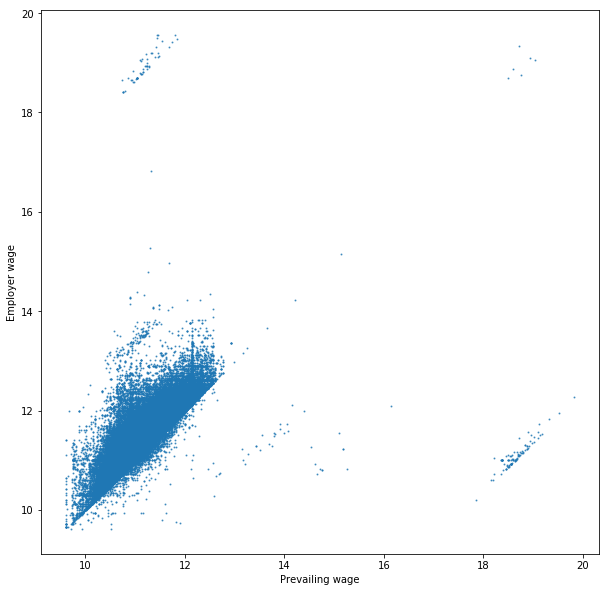

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(np.log(data.prevailing_wage), np.log(data.employer_wage), alpha=0.7, s=1)
plt.xlabel('Prevailing wage')
plt.ylabel('Employer wage')
plt.show()

In [11]:
columns = ['job_title', 'occupational_name', 'prevailing_wage', 'city', 'county', 'state', 'postal_code']
features = data[columns]

In [12]:
y = data.employer_wage

In [13]:
for col in columns:
    print("Number of unique values for column -{}- : {}".format(col, len(features[col].unique())))

Number of unique values for column -job_title- : 92756
Number of unique values for column -occupational_name- : 865
Number of unique values for column -prevailing_wage- : 24052
Number of unique values for column -city- : 9348
Number of unique values for column -county- : 3676
Number of unique values for column -state- : 57
Number of unique values for column -postal_code- : 14923


In [14]:
print("Number of unique values for column -employer_wage- : {}".format(len(y.unique())))

Number of unique values for column -employer_wage- : 50655


In [15]:
# # Merge columns for job titles and occupational name and drop them
# features['titles'] = features.job_title + ' ' + features.occupational_name
# features.drop(['job_title', 'occupational_name'], axis=1, inplace=True)

In [16]:
features.head()

,job_title,occupational_name,prevailing_wage,city,county,state,postal_code
0,ASSOCIATE DATA INTEGRATION,COMPUTER SYSTEMS ANALYSTS,59197.0,RIVERWOODS,LAKE,IL,60015
1,SENIOR ASSOCIATE,OPERATIONS RESEARCH ANALYSTS,49800.0,RIVERWOODS,LAKE,IL,60015
2,PROJECT MANAGER,"COMPUTER OCCUPATIONS, ALL OTHER",90376.0,JERSEY CITY,HUDSON,NJ,07302
3,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,CREDIT ANALYSTS,116605.0,NEW YORK,NEW YORK,NY,10036
4,CREDIT RISK METRICS SPECIALIST,"FINANCIAL SPECIALISTS, ALL OTHER",59405.0,ATLANTA,FULTON,GA,30303


In [17]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# vect_titles = vectorizer.fit_transform(features.titles)
# vect_titles = vect_titles.tocsc()
# print("vect_titles shape: {}".format(vect_titles.shape))

# vect_cities = vectorizer.fit_transform(features.city)
# vect_cities = vect_cities.tocsc()
# print("vect_cities shape: {}".format(vect_cities.shape))

# vect_county = vectorizer.fit_transform(features.county)
# vect_county = vect_county.tocsc()
# print("vect_county shape: {}".format(vect_county.shape))

In [18]:
X = features[['postal_code', 'state', 'prevailing_wage']]
#X['city'] = vect_cities
#X['county'] = vect_county
#X['title'] = vect_titles
X['prevailing_wage'] = np.log(X.prevailing_wage)

y = np.log(y)

/home/pfgr/anaconda3/envs/h1b/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
X.head()

,postal_code,state,prevailing_wage
0,60015,IL,10.988626
1,60015,IL,10.815770
2,07302,NJ,11.411734
3,10036,NY,11.666547
4,30303,GA,10.992134


In [20]:
# X.drop(['city', 'county', 'title'], axis=1, inplace=True)

In [21]:
#X_ = pd.get_dummies(X, columns=['postal_code','state'], drop_first=True)
#X_.head()

In [22]:
def batches(size, X, y):
    batch_start = 0
    n_points = X.shape[0]
    while batch_start < n_points:
        batch_end = batch_start + size
#         X_batch = pd.get_dummies(X.iloc[range(batch_start, batch_end)], \
#                                  columns=['postal_code','state'], drop_first=True)
        if batch_end < n_points:
            X_batch = X.iloc[range(batch_start, batch_end)]
            y_batch = y.iloc[range(batch_start, batch_end)]
        else:
            X_batch = X.iloc[range(batch_start,n_points)]
            y_batch = y.iloc[range(batch_start, n_points)]
        yield X_batch, y_batch
        batch_start += size

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error
from time import time
from dummyPy import OneHotEncoder

encoder = OneHotEncoder(['postal_code', 'state'])
encoder.fit(X)

batch_size = 20000
random_state = 14
regressor_1 = SGDRegressor(random_state=random_state)
regressor_2 = PassiveAggressiveRegressor(random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
iterator = list(batches(batch_size, X_train, y_train))

In [ ]:
for regressor in [regressor_1, regressor_2]:
    start = time() #start time
    for X_batch, y_batch in iterator:
        X_batch_trans = encoder.transform(X_batch)
        regressor.partial_fit(X_batch_trans, y_batch)
    end = time() #end time
    
    regressor_name = regressor.__class__.__name__
    print("%s training time: %.3fs" %(regressor_name, end-start))
    #training_score = regressor.score(X_train, y_train)
    X_test_trans = encoder.transform(X_test)
    test_score = regressor.score(X_test_trans, y_test)
    #print("%s R^2 training score: %.4f" %(regressor_name, training_score))
    print("%s R^2 test score: %.4f" %(regressor_name, test_score))
    y_pred = regressor.predict(X_test_trans)
    mean_error = mean_absolute_error(y_test, y_pred)
    print("Mean absolute error: {}".format(mean_error))

/home/pfgr/anaconda3/envs/h1b/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor training time: 1454.878s


In [ ]:
for regressor in [regressor_1, regressor_2]:
    start = time() #start time
    for X_batch, y_batch in iterator:
        regressor.partial_fit(X_batch, y_batch)
    end = time() #end time
    
    regressor_name = regressor.__class__.__name__
    #training_score = regressor.score(X_train, y_train)
    test_score = regressor.score(X_test, y_test)
    print("%s training time: %.3fs" %(regressor_name, end-start))
    #print("%s R^2 training score: %.4f" %(regressor_name, training_score))
    print("%s R^2 test score: %.4f" %(regressor_name, test_score))
    y_pred = regressor.predict(X_test)
    mean_error = mean_absolute_error(y_test, y_pred)
    print("Mean absolute error: {}".format(mean_error))

In [ ]:
encoder.transform(X[:4])

In [ ]:
X__ = X_.drop(['city'], axis=1)

In [ ]:
pd.get_dummies(X, columns=['county'], drop_first=True)

In [ ]:
np.sum(X.employer.value_counts() <= 10)

In [ ]:
pd.get_dummies(X, columns=['postal_code'], drop_first=True)